https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

https://harikabonthu96.medium.com/kmodes-clustering-2286a9bfdcfb

https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [64]:
# importing necessary libraries
!pip install kmodes

Import pre-requisites & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import os

Load the dataset using Pandas

In [24]:
data=pd.read_csv('Data_Science_Internship - Dump.csv')

In [25]:
data.duplicated().sum()

0

There are no duplicates

As per input, This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.


In [28]:
# Replace column value
data.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0',np.NaN)
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [29]:
# Remove two columns
df =data.drop(['Unnamed: 0', 'Agent_id', 'movein','source' ,'utm_source', 'utm_medium', 'lead_id'],axis = 1)

In [30]:
df.head()

,status,lost_reason,budget,lease,source_city,source_country,des_city,des_country,room_type
0,LOST,Not responding,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
1,LOST,Low budget,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
3,LOST,Low budget,0-0,0,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
4,LOST,Junk lead,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN


### Explore Data

In [31]:
df.shape

(46608, 9)

In [32]:
df.head(3)

,status,lost_reason,budget,lease,source_city,source_country,des_city,des_country,room_type
0,LOST,Not responding,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
1,LOST,Low budget,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status          46608 non-null  object
 1   lost_reason     43244 non-null  object
 2   budget          42908 non-null  object
 3   lease           44267 non-null  object
 4   source_city     46608 non-null  object
 5   source_country  46608 non-null  object
 6   des_city        46608 non-null  object
 7   des_country     46608 non-null  object
 8   room_type       23061 non-null  object
dtypes: object(9)
memory usage: 3.2+ MB


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [34]:
df.describe(include=['object'])

,status,lost_reason,budget,lease,source_city,source_country,des_city,des_country,room_type
count,46608,43244,42908,44267,46608,46608,46608,46608,23061
unique,6,30,1857,311,4336,186,220,15,5
top,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite
freq,43244,8892,9862,11111,8851,18812,7361,42674,12477


In [35]:
df.isnull().sum()

status                0
lost_reason        3364
budget             3700
lease              2341
source_city           0
source_country        0
des_city              0
des_country           0
room_type         23547
dtype: int64

In [36]:
df.apply(lambda x: x.isnull().value_counts())

,status,lost_reason,budget,lease,source_city,source_country,des_city,des_country,room_type
False,46608.0,43244,42908,44267,46608.0,46608.0,46608.0,46608.0,23061
True,NaN,3364,3700,2341,NaN,NaN,NaN,NaN,23547


Null values are present in 'lost_reason', 'budget', 'lease', 'movein', 
'source','source_city', 'source_country, 'utm_source','utm_medium','des_city', 'des_country','room_type', columns.

In the next steps, these missing /null values need to be treated in various ways - Drop/Replace with Mean/Mode after analysis

### Mean/Mode of columns

In [37]:
df_max= pd.DataFrame()
cols=[]
max_list=[]
nulls_count=[]

for c in df.columns:
    cols.append(c)
    max_list.append(df[c].value_counts().idxmax())
    nulls_count.append(df[c].isnull().sum())

df_max['Column'] = pd.Series(cols)
df_max['Max ID']=pd.Series(max_list)
df_max['Null COunt']=pd.Series(nulls_count)
df_max

,Column,Max ID,Null COunt
0,status,LOST,0
1,lost_reason,Low availability,3364
2,budget,£60 - £120 Per week,3700
3,lease,Full Year Course Stay 40 - 44 weeks,2341
4,source_city,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,0
5,source_country,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,0
6,des_city,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0
7,des_country,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0
8,room_type,Ensuite,23547


In [38]:
missing_data = df.isnull()
missing_data.tail(5)

,status,lost_reason,budget,lease,source_city,source_country,des_city,des_country,room_type
46603,False,False,False,False,False,False,False,False,False
46604,False,False,False,False,False,False,False,False,False
46605,False,False,False,False,False,False,False,False,False
46606,False,False,False,False,False,False,False,False,True
46607,False,False,False,False,False,False,False,False,False


Assumption to remove rows with null country

### Value Counts

In [39]:
for c in df.columns:
    print(c)
    print(df[c].value_counts())
    print('------')

status
LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64
------
lost_reason
Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Le

In [45]:
df['lost_reason'].value_counts().to_frame()

,lost_reason
Low availability,8892
Not responding,7827
Not interested,6449
Low budget,5505
Wants private accommodation,2781
Short stay,2264
Not a student,1518
Just Enquiring,1263
Inadequate details,827
Semester stay,817


In [41]:
df['lease'].value_counts().to_frame()

,lease
Full Year Course Stay 40 - 44 weeks,11111
0,7551
Complete Education Year Stay 50 - 52 weeks,6538
51,3963
Semester Stay 20 - 24 weeks,2770
...,...
36-40 weeks,1
12 month,1
44 weeks/51 weeks,1
full year stayt,1


The 'lease' categories need to be checked for correct spelling and similar values

In [42]:
df['room_type'].value_counts().to_frame()

,room_type
Ensuite,12477
Studio,6383
Entire Place,4198
Non-Ensuite,2
Twin-Studio,1


### Drop Columns

In [215]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["source_city",'des_city','des_country'], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [216]:
df.shape

(36315, 9)

In [196]:
missing_data = df.isnull()
missing_data.head(5)

,status,lost_reason,budget,lease,source,source_city,source_country,des_city,des_country,room_type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False


In [217]:
df.isnull().sum()

status                0
lost_reason        2766
budget                1
lease                 2
source_city           0
source_country        0
des_city              0
des_country           0
room_type         13257
dtype: int64

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# Replace column value
df['lost_reason'].replace(np.nan, '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2', inplace=True)
df['budget'].replace(np.nan, '£60 - £120 Per week', inplace=True)
df['lease'].replace(np.nan, 'Full Year Course Stay 40 - 44 weeks', inplace=True)
df.head()

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df_new=df[['']]

"source", 'source_city', 'source_country','utm_source', 'utm_medium',	'des_city',	'des_country', 'lead_id'
columns can be dropped

### Outliers

TypeError: Vertical orientation requires numeric `y` variable.

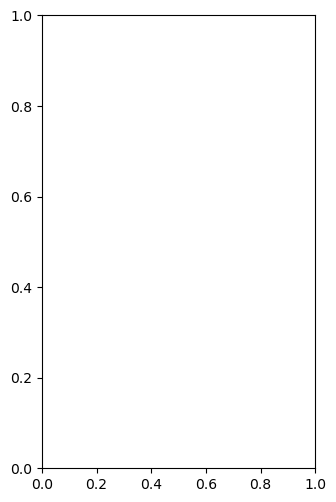

In [46]:
plt.figure(figsize = (12,20))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    #plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.title(feature_list[i])
    plt.tight_layout()

### Save Dataset

In [ ]:
df.to_csv("clean_dataset.csv", index=False)

### K Mode Clustering

In [66]:
from kmodes.kmodes import KModes
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_new)
    cost.append(kmode.cost_)
      
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

ValueError: Input contains NaN